In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
# Load the telecom churn dataset
df = pd.read_csv("./dataset/Telcom_Customer_Churn.csv")

# Display the first few records
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Shape and basic info
print("Dataset Shape:", df.shape)
print("\nDataset Info:\n")
print(df.info())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nStatistical Summary:\n", df.describe(include='all'))


Dataset Shape: (7043, 21)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  

In [5]:
#handling missing vals
# Example handling
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Fill categorical missing values with mode
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_13172\2275054971.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_13172\2275054971.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [6]:
#remove duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")


Removed 0 duplicate rows.


In [7]:
#check for inconsistent data
# Convert all categorical values to consistent lowercase format
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()


In [9]:
#convert cols to correct data types
# standardize column names to lowercase to avoid KeyError from mixed casing
df.columns = df.columns.str.strip().str.lower()

# Convert 'seniorcitizen' to category type (if numeric)
df['seniorcitizen'] = df['seniorcitizen'].astype('category')

# Convert 'churn' column to binary (1 = churned, 0 = not churned)
df['churn'] = df['churn'].map({'yes': 1, 'no': 0})


In [10]:
#identify and handle outliers
# Detect outliers using IQR
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])


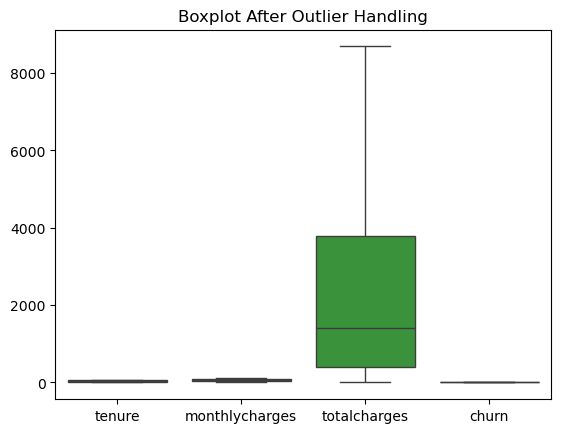

In [11]:
sns.boxplot(data=df[num_cols])
plt.title("Boxplot After Outlier Handling")
plt.show()


In [12]:
# Example: Tenure per month revenue
df['monthly_revenue'] = df['totalcharges'] / (df['tenure'] + 1)

# Example: Has multiple services
df['multiple_services'] = ((df['phoneservice'] == 'yes') & (df['internetservice'] != 'no')).astype(int)

# Example: Long-term customers
df['long_term'] = np.where(df['tenure'] > 24, 1, 0)


In [13]:
#normalise data
scaler = StandardScaler()

# Scale numeric columns
num_cols = ['tenure', 'monthlycharges', 'totalcharges', 'monthly_revenue']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [14]:
#split dataset
X = df.drop('churn', axis=1)
y = df['churn']

# Convert categorical columns using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)


Training Set: (5634, 7075)
Testing Set: (1409, 7075)


In [15]:
#export cleaned dataset
# Combine processed data into a single CSV
cleaned_data = pd.concat([X, y], axis=1)
cleaned_data.to_csv("./dataset/Cleaned_Telecom_Customer_Churn.csv", index=False)

print("✅ Cleaned dataset saved as 'Cleaned_Telecom_Customer_Churn.csv'")


✅ Cleaned dataset saved as 'Cleaned_Telecom_Customer_Churn.csv'


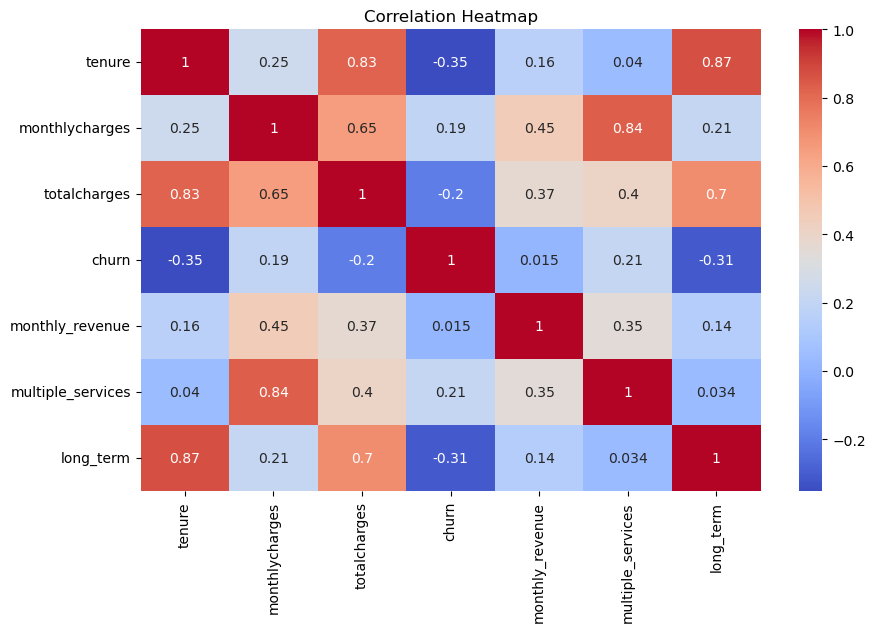

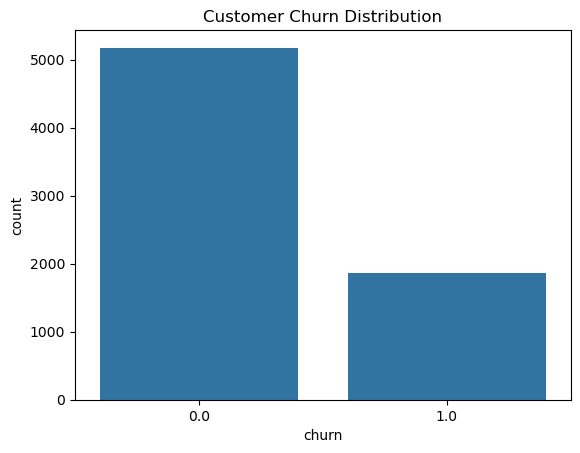

In [16]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Churn rate visualization
sns.countplot(x='churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()
